In [93]:
!pip install wordcloud
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   --- ----------------------------------- 61.4/626.3 kB 218.8 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/626.3 kB 218.8 kB/s eta 0:00:03
   ---- ---------------------------------- 71.7/626.3 kB 196.9 kB/s eta 0:00:03
   ---- ---------------------------------- 71

In [100]:
# import libraries
import regex
import re
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [39]:
# Load data

conversation = 'trh_chats.txt'
with open(conversation, encoding="utf-8") as file:

    data = file.readlines()
    print(data)

["[27/03/2018, 18:53:51] THE READERS' HUB: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n", "[27/03/2018, 18:53:51] THE READERS' HUB: \u200eGroup creator created this group\n", "[27/03/2018, 18:53:51] THE READERS' HUB: \u200eYou were added\n", '[20/04/2024, 10:00:45] ~\u202fRukeeey Nasir: \u200eThis message was deleted by admin Dr Mukhtar Danmallam.\n', '[20/04/2024, 10:06:11] ~\u202fAshafa Abubakar.: Allah yasa alkhairi \n', 'Congratulations 🎉🎊\n', '[20/04/2024, 10:10:07] ~\u202fAshafa Abubakar.: Allah yasa alkhairi \n', 'Allah yajikan @2348032203604 🥹\n', '[20/04/2024, 10:38:28] ~\u202fUMAR MAHUTA: Allah yasa albarka Amin may it be beneficial to Mankind Amin\n', '\u200e[20/04/2024, 10:49:22] ~\u202fNina🖤: \u200esticker omitted\n', '\u200e[20/04/2024, 21:38:38] Hannah Kabeer: \u200eimage omitted\n', '[20/04/2024, 21:54:27] Dr. Umar Farouk: https://docs.google.com/forms/d/e/1FAIpQLScYccHNPzobOVit9Y-nEFK3B

In [41]:
# Load data
with open('trh_chats.txt', encoding="utf-8") as file:
    data = file.readlines()

# Define a list to store processed messages
messages = []

# Regular expression to identify a message line
message_pattern = r'^\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] (.*?): (.+)$'

# Process each line
for line in data:
    match = re.match(message_pattern, line)
    if match:
        date, time, author, message = match.groups()
        messages.append({
            "date": date,
            "time": time,
            "author": author.strip(),
            "message": message.strip()
        })

# Convert to a Pandas DataFrame
df = pd.DataFrame(messages)

# Save to a CSV file
df.to_csv('whatsapp_chat.csv', index=False)

print("Data transformed successfully! The CSV file is saved as 'whatsapp_chat.csv'.")

Data transformed successfully! The CSV file is saved as 'whatsapp_chat.csv'.


In [43]:
df.head()

,date,time,author,message
0,27/03/2018,18:53:51,THE READERS' HUB,‎Messages and calls are end-to-end encrypted. ...
1,27/03/2018,18:53:51,THE READERS' HUB,‎Group creator created this group
2,27/03/2018,18:53:51,THE READERS' HUB,‎You were added
3,20/04/2024,10:00:45,~ Rukeeey Nasir,‎This message was deleted by admin Dr Mukhtar ...
4,20/04/2024,10:06:11,~ Ashafa Abubakar.,Allah yasa alkhairi


In [45]:
# Convert the date column to date_time format
df['date'] = pd.to_datetime(df['date'], dayfirst=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_9600\4219854282.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], dayfirst=False)


In [47]:
# Print the last 5 chats sent in the group
print(df.tail())

           date      time                        author  \
4234 2024-12-24  11:30:40  ~ ~ Butterman’s Exclusives ~   
4235 2024-12-24  13:27:37            Umar Bishir Abukur   
4236 2024-12-24  14:16:39               Majeed Dan Baba   
4237 2024-12-24  14:26:45     Aliyu Lumumba Jr Suleiman   
4238 2024-12-24  14:34:20               Majeed Dan Baba   

                                                message  
4234                                       Okayy thanks  
4235                         ‎This message was deleted.  
4236  Bringing to you a powerful Hausa poetry rendit...  
4237  Commendable I listen to this on FB very insigh...  
4238  Thank you so much Aliyu. Wanna see how I will ...  


In [49]:
# Message Count
df["message"].count()

4239

In [73]:
# Distribution of Messages sent by the members of the group
Message_Count = df["author"].value_counts().head(10)
Message_Count

author
Faisal Kurfi                 287
Engr. Kabir Ruma             201
Dr Mukhtar Danmallam         113
Majeed Dan Baba              102
Sir Smart😎                    96
Yusuf Hamisu                  86
~ Bello Dahiru                84
Umar Mustapha Kutawa          73
Aliyu Lumumba Jr Suleiman     73
maryam sabo                   73
Name: count, dtype: int64

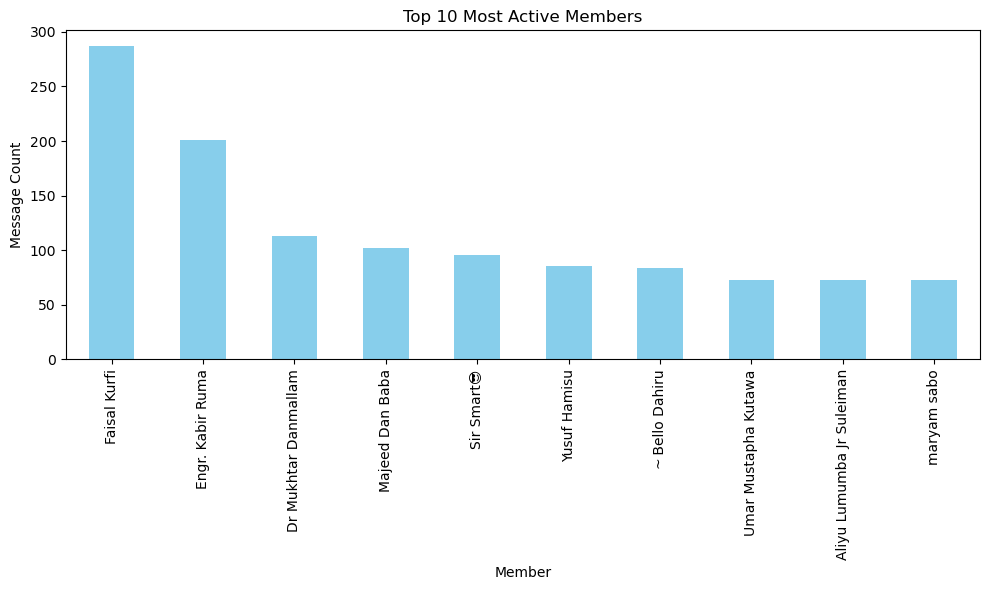

In [77]:
# Plot bar chart for message count per author
plt.figure(figsize=(10, 6))
Message_Count.plot(kind='bar', x= Message_Count.values, color='skyblue')
plt.title('Top 10 Most Active Members')
plt.xlabel('Member')
plt.ylabel('Message Count')
#plt.yticks(Message_Count.values)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9600\2386853412.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


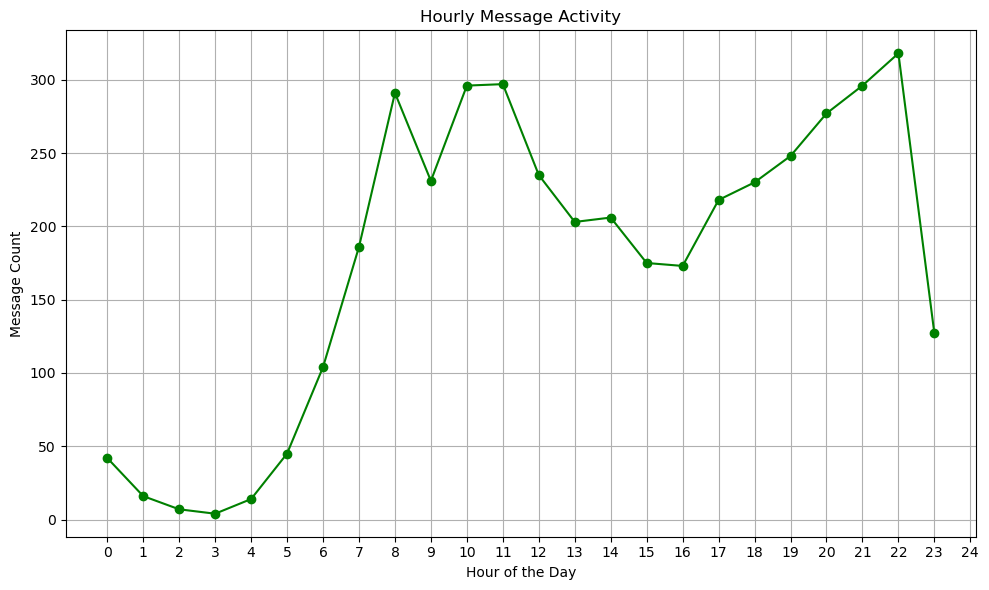

In [55]:
# Extract hour from time and calculate message count per hour

df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour
hourly_message_count = df.groupby('hour').size()

# Plot line chart for message count per hour
plt.figure(figsize=(10, 6))
hourly_message_count.plot(kind='line', marker='o', color='green')
plt.title('Hourly Message Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Message Count')
plt.xticks(range(25))
plt.grid(True)
plt.tight_layout()
plt.show()

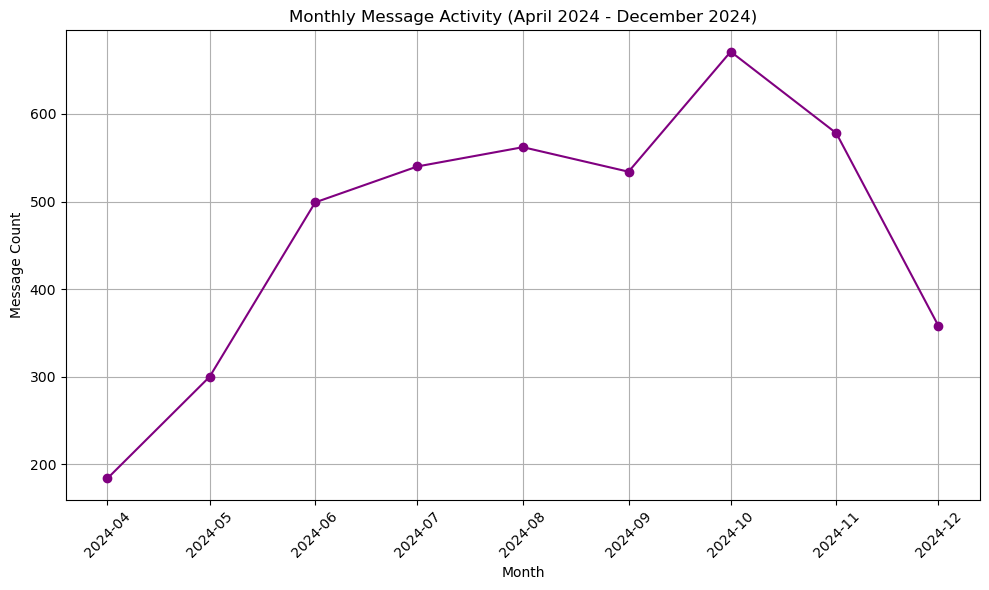

In [57]:
# Convert 'datetime' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter DataFrame to include data only from September 2023 to February 2024
filtered_df = df[(df['date'] >= '2024-04-01') & (df['date'] < '2024-12-24')]

# Group by month and year and calculate message count per month
monthly_message_count = filtered_df.groupby(filtered_df['date'].dt.to_period('M')).size()

# Create a DataFrame with months as index and message counts as values
monthly_message_count_df = pd.DataFrame(monthly_message_count)
monthly_message_count_df.columns = ['Message Count']

# Convert period index to datetime objects
monthly_message_count_df.index = monthly_message_count_df.index.to_timestamp()

# Plot line chart for message count per month
plt.figure(figsize=(10, 6))
plt.plot(monthly_message_count_df.index, monthly_message_count_df['Message Count'], marker='o', color='purple')

plt.title('Monthly Message Activity (April 2024 - December 2024)')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.grid(True)

# Set x-axis limits to the timeframe of the dataset
#plt.xlim('2023-09-01', '2024-02-25')

plt.tight_layout()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Distribution:
sentiment_category
Neutral     0.604152
Positive    0.334749
Negative    0.061099
Name: proportion, dtype: float64


<Axes: ylabel='proportion'>

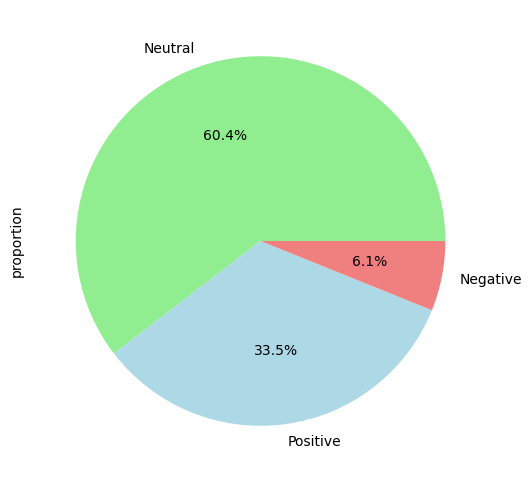

In [104]:
# Initialize VADER sentiment analyzer

import nltk
nltk.download('vader_lexicon')


sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each message
sentiment_scores = df['message'].apply(lambda x: sid.polarity_scores(x))

# Add sentiment scores to DataFrame
df['compound_sentiment'] = [score['compound'] for score in sentiment_scores]

# Categorize sentiment into positive, neutral, or negative
df['sentiment_category'] = df['compound_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))

# Print the proportion of positive, neutral, and negative messages
sentiment_counts = df['sentiment_category'].value_counts(normalize=True)
print("Sentiment Distribution:")
print(sentiment_counts)

# Plot pie chart for sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])

In [96]:
# Message Length Analysis
df['message_length'] = df['message'].apply(len)

avg_message_length = df.groupby('author')['message_length'].mean().head(10)

print("Average Message Length by Author:")
print(avg_message_length)

Average Message Length by Author:
author
A.Y_RafinDadi           13.250000
ABM                     24.666667
AHD                     31.090909
Abberh                  31.826087
Abdullah Abubakar       33.500000
Abdullahi BUK           25.000000
Abdullahi Daura TRH     51.555556
Abdullahi Tukur         17.666667
Abdulrahman Saulawa    108.155172
Abdulrazak YB           33.702128
Name: message_length, dtype: float64


In [102]:
# Sentiment Analysis
def get_sentiment(message):
    blob = TextBlob(message)
    return blob.sentiment.polarity

df['sentiment'] = df['message'].apply(get_sentiment)
average_sentiment = df.groupby('author')['sentiment'].mean()

print("\nAverage Sentiment by Author:")
print(average_sentiment)


Average Sentiment by Author:
author
A.Y_RafinDadi          0.065000
ABM                    0.000000
AHD                    0.009091
Abberh                 0.060559
Abdullah Abubakar     -0.027778
                         ...   
‪+234 706 840 3663‬    0.000000
‪+234 803 044 1187‬    0.000000
‪+234 806 902 0269‬    0.068750
‪+234 814 079 1965‬    0.000000
‪+234 902 848 9837‬    0.136364
Name: sentiment, Length: 397, dtype: float64


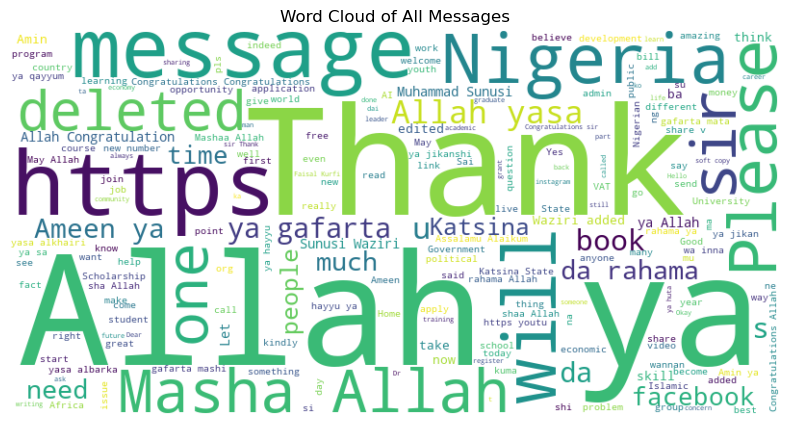

In [85]:
# 3. Keywords and Themes (Word Cloud)
all_messages = " ".join(df['message'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_messages)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of All Messages")
plt.show()

In [87]:
# Emotional or Event-Based Analysis
keywords = ['congratulations', 'happy', 'RIP', 'sorry', 'Ameen']
df['emotion_keywords'] = df['message'].apply(
    lambda msg: [kw for kw in keywords if kw.lower() in msg.lower()]
)

print("\nMessages Containing Emotional Keywords:")
print(df[df['emotion_keywords'].apply(len) > 0][['date', 'author', 'message', 'emotion_keywords']])


Messages Containing Emotional Keywords:
           date                  author  \
24   2024-04-22         Yusuf Usman TRH   
27   2024-04-22          Zainul'abideen   
33   2024-04-22            Habiba Mashi   
40   2024-04-22              Mai Dabino   
50   2024-04-22        Abdulsamad Ahmad   
...         ...                     ...   
4001 2024-12-08  Zubair Mukhtar Danmusa   
4002 2024-12-08         Majeed Dan Baba   
4003 2024-12-08          Ibrahim Shafiu   
4067 2024-12-16     ~ Sulaiman Maijamaa   
4076 2024-12-16              Mai Dabino   

                                                message   emotion_keywords  
24                                       Ameen ya Allah            [Ameen]  
27                    Ameen, Allah ya jikansa da rahama            [Ameen]  
33    May Allah forgive his shortcomings and grant h...            [Ameen]  
40                                   Ameen thumma ameen            [Ameen]  
50    Allah ya jikan shi yasa ya huta . Allah yasa A...  

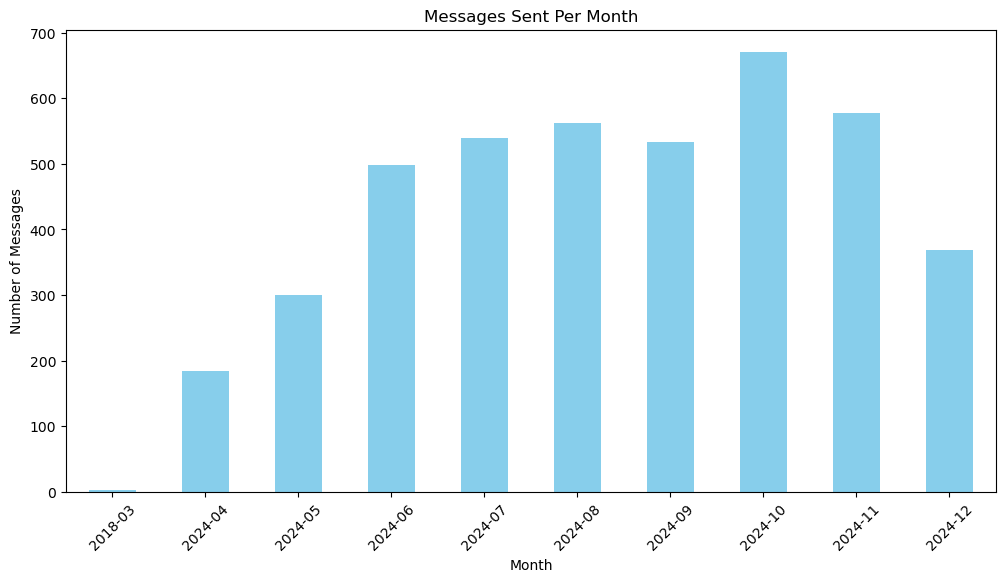

In [89]:
# 5. Long-Term Trends
messages_per_month = df.groupby(df['date'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
messages_per_month.plot(kind="bar", color="skyblue")
plt.title("Messages Sent Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.show()